<a href="https://colab.research.google.com/github/irisroques/classificador-vinhos/blob/main/BaseVinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação da Qualidade de Vinhos


# Roteiro 

## Pre Processamento

1. União das bases de vinho tinto e branco
2. Eliminação de valores faltosos
3. Eliminação de valores duplicados
4. Eliminação de outliers
5. Balanceamento da base de dados
6. Separação em treino e teste

## Questões

1. criem 5 comitês homogêneos (k-NN, AD, Naive, MLP e SVM) para cada um dos tamanhos escolhidos (os tamanhos são 5, 10 e 20).
2. selecione apenas os 3 algoritmos de classificação que alcançaram as melhores acuracias nos respectivos comitês para formar os comitês heterogêneos (vamos chamá-los de X, Y e Z).
3. Com esses algoritmos, crie 4 estruturas de comitês
heterogêneos, onde 3 deles são resultantes da combinação de dois tipos de algoritmos (XY, XZ e YZ) e a última estrutura
combina os três algoritmos (XYZ).
4. Escolha os dois melhores comitês (melhor acurácia e desvio padrão) e altere-os, fazendo
a devida combinação, adicionando dois melhores classificadores (item I), como meta-classificadores. Aplique essas estruturas
de comitês para os mesmos tamanhos e métodos de combinação dos comitês homogêneos utilizados no item anterior (os
tamanhos são 5, 10 e 20). A

## Pre Processamento

In [12]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.under_sampling import TomekLinks


ModuleNotFoundError: No module named 'imblearn'

In [4]:
#carregando os dados
import pandas as pd
red = pd.read_csv('https://raw.githubusercontent.com/irisroques/classificador-vinhos/main/winequality-red-pretty.csv')
white = pd.read_csv('https://raw.githubusercontent.com/irisroques/classificador-vinhos/main/winequality-white-pretty.csv')


#unificando as duas bases de dados
wine = pd.concat([red,white])
wine.info() #base concatenada


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
wine_clean = wine.dropna() #a função dropna remove dados nulos
wine_clean.duplicated() # identificando se há valores duplicados

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 6497, dtype: bool

In [6]:
wine_clean = wine_clean.drop_duplicates()
wine_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5318 non-null   float64
 1   volatile acidity      5318 non-null   float64
 2   citric acid           5318 non-null   float64
 3   residual sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free sulfur dioxide   5318 non-null   float64
 6   total sulfur dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  quality               5318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


## Identificando Outliers

In [7]:
wine_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222,5.795600
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964,0.879715
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
#Identificando outliers
sugar = wine_clean[np.abs(wine_clean['residual sugar']) > 20].index #removendo outlier açucar
wine_clean.drop(sugar,inplace=True)

free_sulfur = wine_clean[np.abs(wine_clean['free sulfur dioxide']) > 100].index
wine_clean.drop(free_sulfur,inplace=True)

total_sulfur = wine_clean[np.abs(wine_clean['total sulfur dioxide']) > 200].index
wine_clean.drop(total_sulfur,inplace=True)

wine_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.00000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000
mean,7.207642,0.341488,0.316743,4.745124,0.056275,28.726188,108.44785,0.994325,3.225867,0.531382,10.615079,5.820407
std,1.328182,0.167826,0.145459,4.197742,0.036570,16.071551,50.23281,0.002880,0.160762,0.151404,1.182947,0.884272
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.700000,0.037000,16.000000,74.00000,0.992000,3.120000,0.430000,9.600000,5.000000
50%,7.000000,0.290000,0.310000,2.600000,0.047000,27.000000,113.00000,0.994330,3.220000,0.510000,10.500000,6.000000
75%,7.700000,0.410000,0.390000,6.900000,0.066000,39.000000,147.00000,0.996590,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,19.950000,0.611000,98.000000,200.00000,1.003690,4.010000,2.000000,14.900000,9.000000


In [9]:
wine_features = wine_clean.drop('quality', axis=1) #separando as features dos alvos
wine_target = wine_clean['quality'] # criando vetor alvo


In [10]:
from sklearn import preprocessing
x_wine_scaled = preprocessing.scale(wine_clean)
wine_scaled = pd.DataFrame(x_wine_scaled)
scaler = preprocessing.StandardScaler().fit(wine_scaled)
scaler.transform(wine_scaled)


array([[ 0.44603723,  3.20907504, -2.17776538, ...,  0.98169572,
        -0.68909486, -0.92787232],
       [ 0.44603723,  2.49397626, -1.90274593, ...,  0.78353024,
        -0.68909486, -0.92787232],
       [ 3.00619133, -0.36641886,  1.67250696, ...,  0.32114412,
        -0.68909486,  0.20311749],
       ...,
       [-0.53284522, -0.60478512, -0.87142298, ..., -0.47151779,
        -1.02726834,  0.20311749],
       [-1.28583172, -0.3068273 , -0.11511949, ..., -0.99995907,
         1.84720629,  1.3341073 ],
       [-0.90933847, -0.78355981,  0.43491942, ..., -1.39629003,
         1.00177257,  0.20311749]])

In [1]:
print("hi")

hi


In [ ]:
wine 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


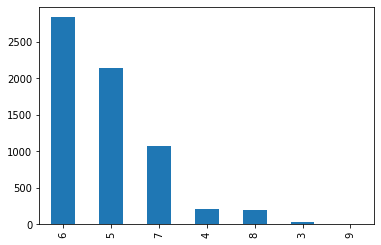

In [ ]:
wine['quality'].value_counts().plot(kind='bar')
plt.show()

In [10]:
X = wine_features
y = wine_target

In [11]:


oneHotEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [2, 4, 5, 9])], remainder='passthrough')
X_encoded = oneHotEncoder.fit_transform(X)

#ESCALONANDO
X_scaled = preprocessing.scale(X_encoded)
X_scaled.shape

#Balanceando
X_under, Y_under = TomekLinks(sampling_strategy='all').fit_sample(X_scaled, Y)

NameError: name 'ColumnTransformer' is not defined

In [ ]:
X.corr() #Matriz de Correlação das features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


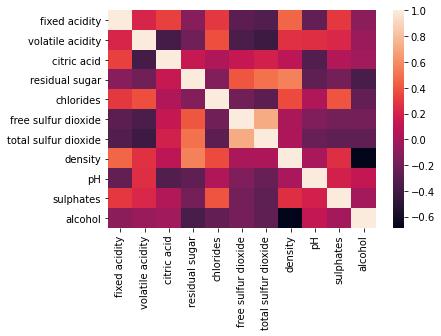

In [ ]:
sns.heatmap(X.corr()); #Correlation Heatmap

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treino e 30% teste
print(len(X_train)) #dados de treinamento
print(len(X_test)) #dados de teste

4141
1776


In [ ]:
#Criando o objeto de classificação AdaBoosting
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, learning_rate=1)

#Treinamento
model = abc.fit(X_train, y_train) 

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[6 6 6 ... 6 6 6]


In [ ]:
percentage = model.score(X_test, y_test)
print(percentage)

0.45099383139136395


In [ ]:
#modelo de classificação KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#classificação de treinamento KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4682051282051282


In [ ]:
#Support Vector Machines
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.4430769230769231


In [14]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5349099099099099



*   kernel rbf  - 58%
*   kernel sigmoid - 44 %
*   kernel poly - 43 % (rodou no jupyter local)
*   kernel linear - 53 %





In [ ]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
print(metrics.accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 1459 points : 857
0.4126113776559287


In [ ]:
#Multi-layer Perceptron (MLP) 
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.5044551062371487
